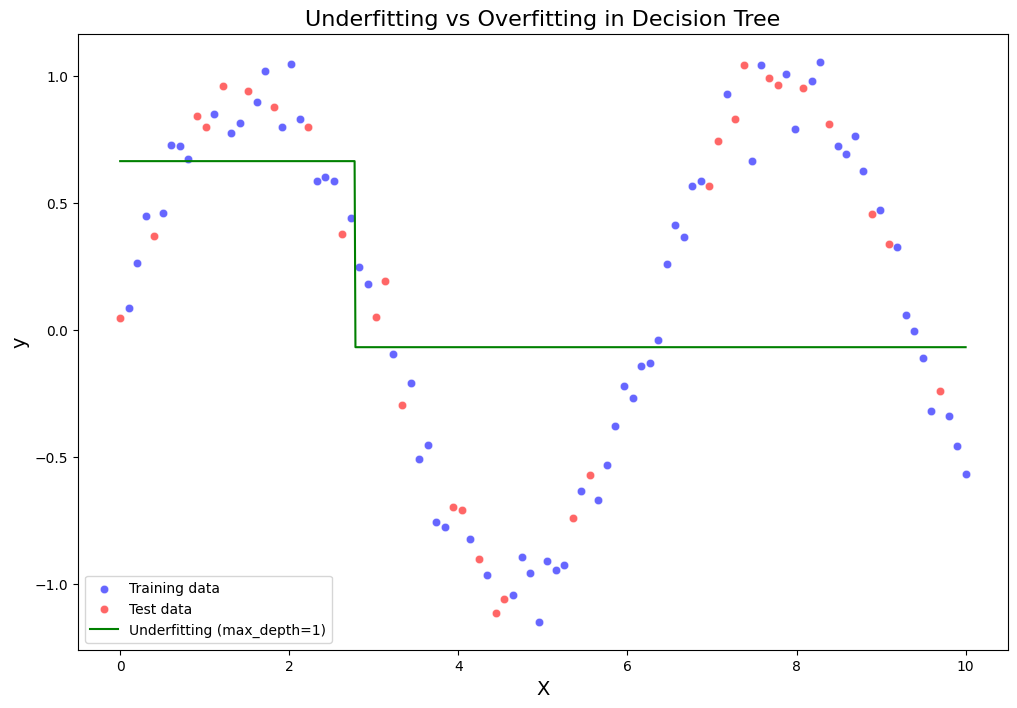

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Tạo dữ liệu minh họa
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tạo các mô hình Decision Tree với độ phức tạp khác nhau
# Underfitting: max_depth quá nhỏ
tree_underfit = DecisionTreeRegressor(max_depth=1, random_state=42)
tree_underfit.fit(X_train, y_train)

# Overfitting: max_depth quá lớn
tree_overfit = DecisionTreeRegressor(max_depth=20, random_state=42)
tree_overfit.fit(X_train, y_train)

# Good fit: max_depth vừa phải
tree_goodfit = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_goodfit.fit(X_train, y_train)

# Dự đoán trên tập dữ liệu
X_plot = np.linspace(0, 10, 1000).reshape(-1, 1)
y_underfit = tree_underfit.predict(X_plot)
y_overfit = tree_overfit.predict(X_plot)
y_goodfit = tree_goodfit.predict(X_plot)

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_train.ravel(), y=y_train, color='blue', label='Training data', alpha=0.6)
sns.scatterplot(x=X_test.ravel(), y=y_test, color='red', label='Test data', alpha=0.6)
sns.lineplot(x=X_plot.ravel(), y=y_underfit, color='green', label='Underfitting (max_depth=1)')
# sns.lineplot(x=X_plot.ravel(), y=y_overfit, color='purple', label='Overfitting (max_depth=20)')
# sns.lineplot(x=X_plot.ravel(), y=y_goodfit, color='orange', label='Good fit (max_depth=3)')
plt.title('Underfitting vs Overfitting in Decision Tree', fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.show()

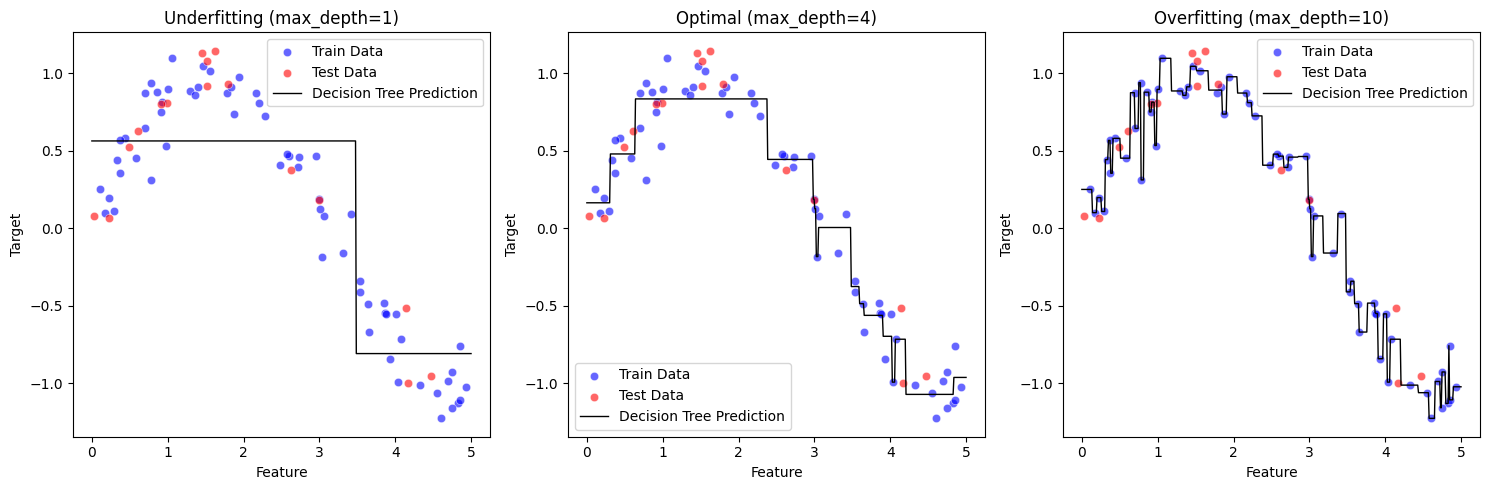

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Tạo dữ liệu giả lập
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.15, X.shape[0])

# Tạo tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện các mô hình Decision Tree với độ sâu khác nhau
tree_underfit = DecisionTreeRegressor(max_depth=1)  # Underfitting
tree_optimal = DecisionTreeRegressor(max_depth=4)   # Optimal
tree_overfit = DecisionTreeRegressor(max_depth=10)  # Overfitting

tree_underfit.fit(X_train, y_train)
tree_optimal.fit(X_train, y_train)
tree_overfit.fit(X_train, y_train)

# Dự đoán
X_plot = np.linspace(0, 5, 500).reshape(-1, 1)
y_pred_underfit = tree_underfit.predict(X_plot)
y_pred_optimal = tree_optimal.predict(X_plot)
y_pred_overfit = tree_overfit.predict(X_plot)

# Vẽ biểu đồ
plt.figure(figsize=(15, 5))

models = [("Underfitting (max_depth=1)", y_pred_underfit),
          ("Optimal (max_depth=4)", y_pred_optimal),
          ("Overfitting (max_depth=10)", y_pred_overfit)]

for i, (title, y_pred) in enumerate(models, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=X_train.ravel(), y=y_train, color='blue', label="Train Data", alpha=0.6)
    sns.scatterplot(x=X_test.ravel(), y=y_test, color='red', label="Test Data", alpha=0.6)
    plt.plot(X_plot, y_pred, color='black', linewidth=1, label="Decision Tree Prediction")
    plt.title(title)
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.legend()

plt.tight_layout()
plt.show()
